# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shahritus
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | santa terezinha
Processing Record 6 of Set 1 | ghadamis
Processing Record 7 of Set 1 | san luis de la loma
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | santa elena de uairen
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | sao gabriel da cachoeira
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | sisimiut
Processing Record 15 of Set 1 | afaahiti
Processing Record 16 of Set 1 | tralee
Processing Record 17 of Set 1 | vadso
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | khyzy
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of S

Processing Record 37 of Set 4 | howard springs
Processing Record 38 of Set 4 | xilin hot
Processing Record 39 of Set 4 | egilsstadir
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | tongliao
Processing Record 42 of Set 4 | revda
Processing Record 43 of Set 4 | korla
Processing Record 44 of Set 4 | saratamata
City not found. Skipping...
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | kavaratti
Processing Record 47 of Set 4 | tsiombe
Processing Record 48 of Set 4 | nanao
Processing Record 49 of Set 4 | port alfred
Processing Record 0 of Set 5 | paciran
Processing Record 1 of Set 5 | horta
Processing Record 2 of Set 5 | mana
Processing Record 3 of Set 5 | chocznia
Processing Record 4 of Set 5 | boueni
Processing Record 5 of Set 5 | pauini
Processing Record 6 of Set 5 | minas de marcona
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | mata-utu
Processing Record 9 of Set 5 | mount isa
Processing Record 10 of Set 5 | miyaly


Processing Record 29 of Set 8 | cambria
Processing Record 30 of Set 8 | n'zeto
Processing Record 31 of Set 8 | yichang
Processing Record 32 of Set 8 | kertih
Processing Record 33 of Set 8 | gornyy
Processing Record 34 of Set 8 | jishui
Processing Record 35 of Set 8 | island harbour
Processing Record 36 of Set 8 | ocos
Processing Record 37 of Set 8 | east end
Processing Record 38 of Set 8 | mikhaylovskaya
Processing Record 39 of Set 8 | bargara
City not found. Skipping...
Processing Record 40 of Set 8 | qamdo
Processing Record 41 of Set 8 | usogorsk
Processing Record 42 of Set 8 | yeppoon
Processing Record 43 of Set 8 | sishilichengzi
City not found. Skipping...
Processing Record 44 of Set 8 | santa ana
Processing Record 45 of Set 8 | tofol
Processing Record 46 of Set 8 | sylvania
Processing Record 47 of Set 8 | tazovsky
Processing Record 48 of Set 8 | watertown
Processing Record 49 of Set 8 | laguna
Processing Record 0 of Set 9 | buga
Processing Record 1 of Set 9 | el astillero
Process

Processing Record 19 of Set 12 | seminole
Processing Record 20 of Set 12 | kone
Processing Record 21 of Set 12 | camana
Processing Record 22 of Set 12 | as pontes de garcia rodriguez
Processing Record 23 of Set 12 | port saint john's
Processing Record 24 of Set 12 | honiara
Processing Record 25 of Set 12 | suphan buri
Processing Record 26 of Set 12 | selfoss
Processing Record 27 of Set 12 | alofi
Processing Record 28 of Set 12 | bengkulu
Processing Record 29 of Set 12 | birobidzhan
Processing Record 30 of Set 12 | tionk essil
Processing Record 31 of Set 12 | zykovo
Processing Record 32 of Set 12 | shenjiamen
Processing Record 33 of Set 12 | murzuq
Processing Record 34 of Set 12 | tashla
Processing Record 35 of Set 12 | darwin
Processing Record 36 of Set 12 | sinan
Processing Record 37 of Set 12 | san julian
Processing Record 38 of Set 12 | zhumysker
Processing Record 39 of Set 12 | inarajan village
Processing Record 40 of Set 12 | sept-iles
Processing Record 41 of Set 12 | iquique
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shahritus,37.2637,68.1385,82.96,22,0,3.22,TJ,1689980101
1,puerto ayora,-0.7393,-90.3518,84.16,80,67,11.92,EC,1689980101
2,bredasdorp,-34.5322,20.0403,44.85,72,97,4.23,ZA,1689980102
3,ushuaia,-54.8000,-68.3000,28.06,74,0,14.97,AR,1689980102
4,santa terezinha,-29.9002,-50.0904,63.95,93,24,14.18,BR,1689980102


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shahritus,37.2637,68.1385,82.96,22,0,3.22,TJ,1689980101
1,puerto ayora,-0.7393,-90.3518,84.16,80,67,11.92,EC,1689980101
2,bredasdorp,-34.5322,20.0403,44.85,72,97,4.23,ZA,1689980102
3,ushuaia,-54.8000,-68.3000,28.06,74,0,14.97,AR,1689980102
4,santa terezinha,-29.9002,-50.0904,63.95,93,24,14.18,BR,1689980102


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

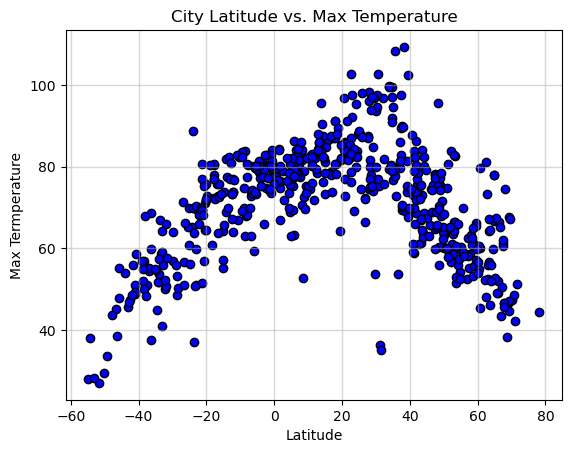

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "blue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Termperature")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

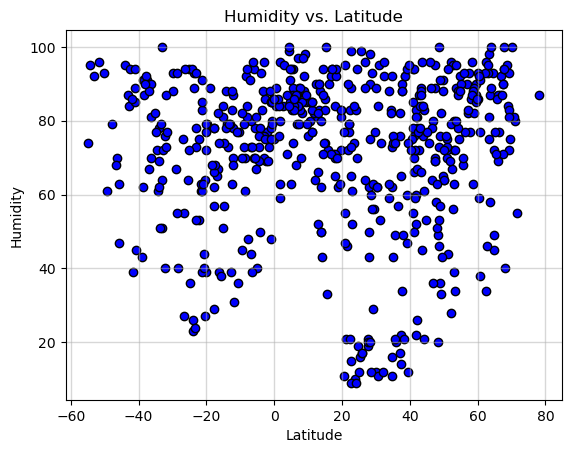

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df['Humidity'], facecolor="blue", edgecolor='black')

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

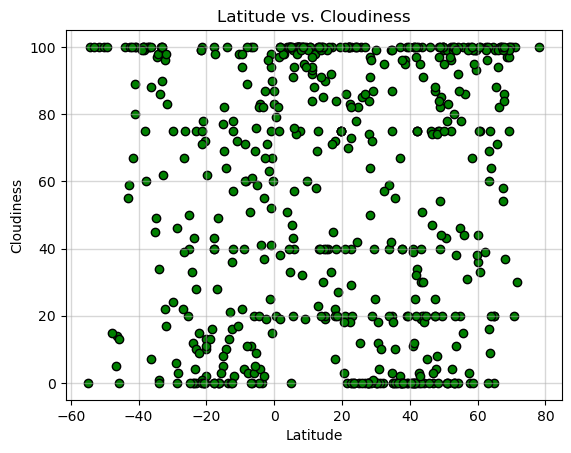

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], facecolor="green", edgecolor="Black")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

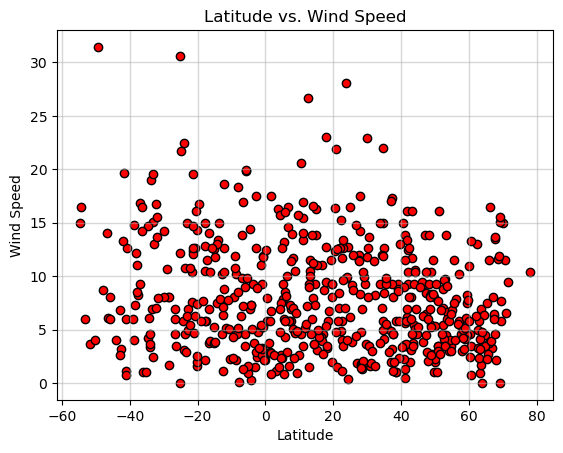

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], facecolor="red", edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linear_reg(x,y):
    print(f"The R-squared is: {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi=city_data_df.loc[city_data_df["Lat"] >= 0]
north_hemi_df=pd.DataFrame(north_hemi)
# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shahritus,37.2637,68.1385,82.96,22,0,3.22,TJ,1689980101
5,ghadamis,30.1337,9.5007,93.63,12,0,11.79,LY,1689980102
6,san luis de la loma,17.2706,-100.8939,87.15,71,45,8.66,MX,1689980102
8,santa elena de uairen,4.6167,-61.1333,69.01,85,33,2.57,VE,1689980103
9,bethel,41.3712,-73.4140,82.27,76,0,3.44,US,1689980103


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi= city_data_df.loc[city_data_df["Lat"] < 0]
south_hemi_df= pd.DataFrame(south_hemi)
# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,84.16,80,67,11.92,EC,1689980101
2,bredasdorp,-34.5322,20.0403,44.85,72,97,4.23,ZA,1689980102
3,ushuaia,-54.8000,-68.3000,28.06,74,0,14.97,AR,1689980102
4,santa terezinha,-29.9002,-50.0904,63.95,93,24,14.18,BR,1689980102
7,puerto natales,-51.7236,-72.4875,27.00,96,100,3.60,CL,1689980103


###  Temperature vs. Latitude Linear Regression Plot

The R-squared is: -0.6


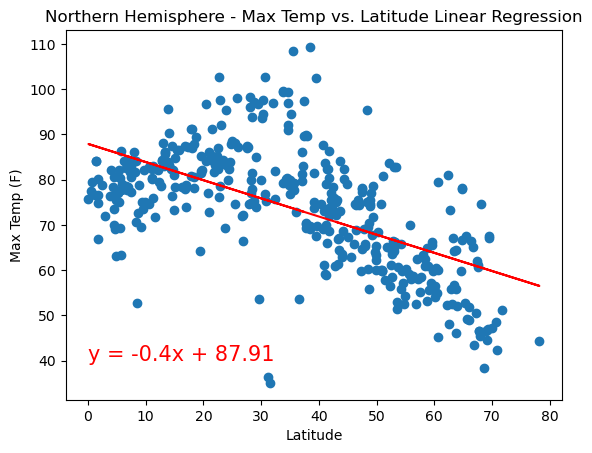

In [27]:
# Linear regression on Northern Hemisphere
equation = linear_reg(north_hemi_df["Lat"], north_hemi_df["Max Temp"])
annotate(equation, 0, 40)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig5.png")

The R-squared is: 0.83


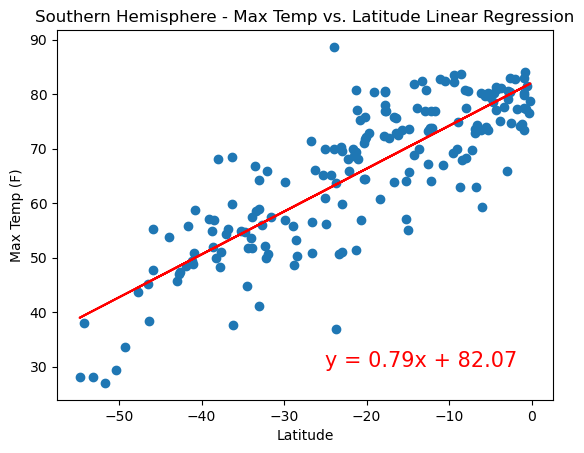

In [31]:
# Linear regression on Southern Hemisphere
equation = linear_reg(south_hemi_df["Lat"], south_hemi_df["Max Temp"])
annotate(equation, -25, 30)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** In these first two graphs we can see that as the Temperature gets closer to Latitude 0, the Equator, the "Max Temp" gets higher. 

In the Northern Hemisphere, the regression line goes down the further south the Latitudes go. In the Southern Hemisphere, we see the regression line going up as you travel further up north to the equator.

### Humidity vs. Latitude Linear Regression Plot

The R-squared is: -0.0


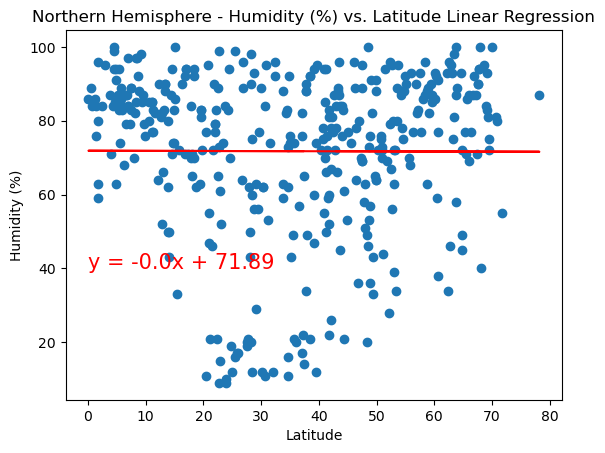

In [34]:
# Northern Hemisphere
equation = linear_reg(north_hemi_df["Lat"], north_hemi_df["Humidity"])
annotate(equation, 0, 40)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig7.png")

The R-squared is: -0.05


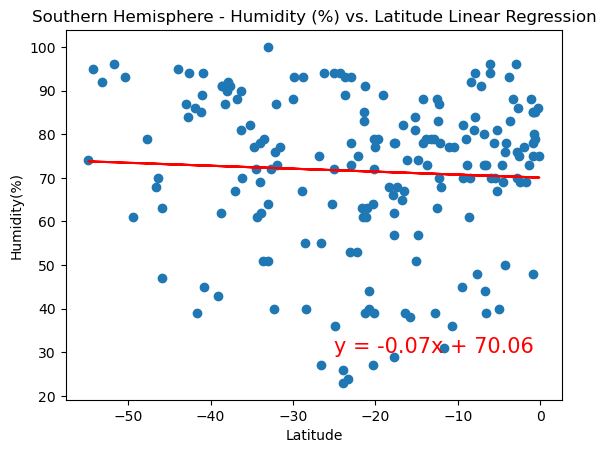

In [35]:
# Southern Hemisphere
equation = linear_reg(south_hemi_df["Lat"], south_hemi_df["Humidity"])
annotate(equation, -25, 30)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** In these two graphs we can see slight regression lines showing that Humidity is actually going down as we get closer to the equator. I was expecting hte opposite actually. This could be due to the random number generator for the "Latitude" and "Longitude".

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared is: -0.07


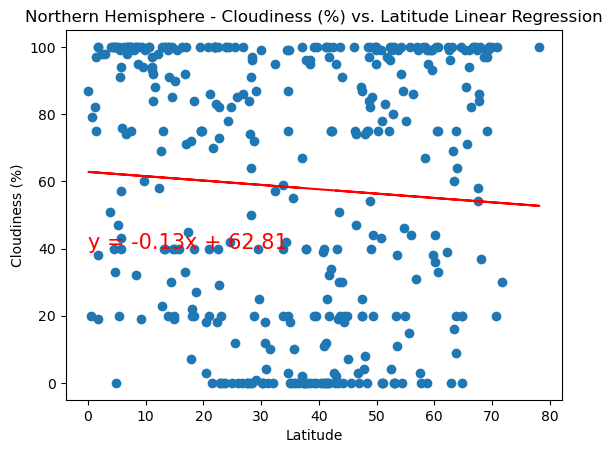

In [36]:
# Northern Hemisphere
equation = linear_reg(north_hemi_df["Lat"], north_hemi_df["Cloudiness"])
annotate(equation, 0, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig9.png")

The R-squared is: -0.19


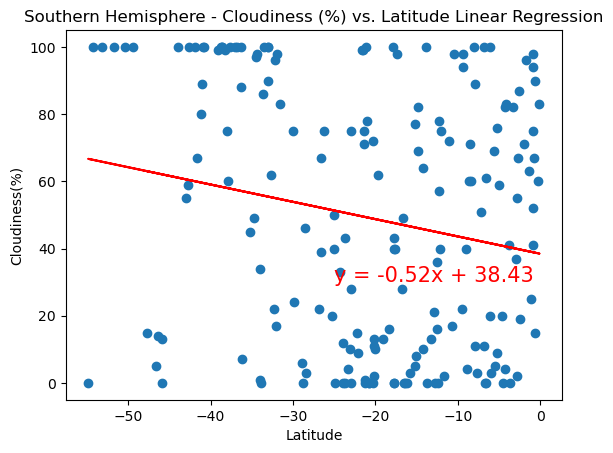

In [37]:
# Southern Hemisphere
equation = linear_reg(south_hemi_df["Lat"], south_hemi_df["Cloudiness"])
annotate(equation, -25, 30)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** For the two cloudiness plots we see that the % of clouds goes down as we approach the equator, "0 Latitude" in the Southern hemisphere. But the Northern hemisphere we see the opposite. More clouds as we move to the equator.  

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared is: -0.14


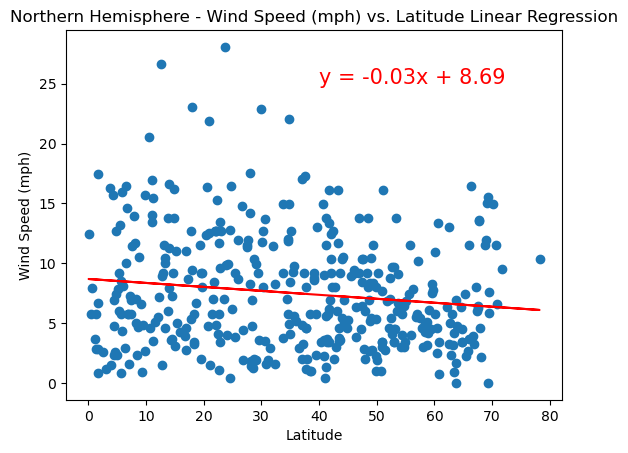

In [39]:
# Northern Hemisphere
equation = linear_reg(north_hemi_df["Lat"], north_hemi_df["Wind Speed"])
annotate(equation, 40, 25)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig11.png")

The R-squared is: -0.15


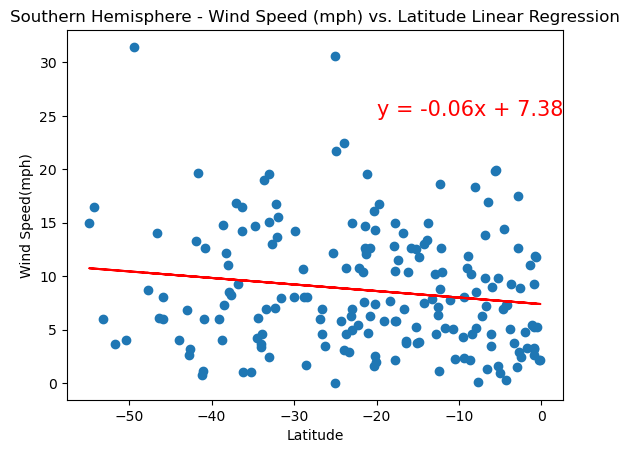

In [41]:
# Southern Hemisphere
equation = linear_reg(south_hemi_df["Lat"], south_hemi_df["Wind Speed"])
annotate(equation,-20, 25)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:**  Here we see that the wind speeds seems to be lower at the equator in the southern hemisphere. But wind speed gets higher as you approach the equator in the northern hemisphere.